# Model combining (ensemble methods)
복수의 예측모형을 결합하여 __더 나은 성능__을 예측을 하려는 시도이다.
<br/>
모형 결합 방법을 사용하며 일반적으로 __계산량을 증가__하지만 다음과 같은 효과가 있다.
 - 단일 모형사용할때 보다 성능 __분산이 감소__하고, 과최적화를 방지한다
 - 개별모형의 성능이 안좋을 경우에 결합 모형의 성능이 향상된다.
 - Aggregation 과 Boosting 으로 나뉘어진다


## Aggregation 과 Boosting 의 차이

- Aggregation : 사용할 모형이 결정되어있다.
- Boosting : 사용할 모형을 점진적으로 늘려간다.

### Aggregation (Bagging)
- 사용할 모형의 집합이 결정되어 있다.
- Bagging
- Model Averaging : Mean value (Regression)
- voting : The most frequency (Classfication : we can change probability)
    - Hard voting : 단순 투표, 개별 모형의 결과 기준
    - Soft voting : 가중치 투표, 개별 모형의 조건부 확률 합 기준
- Random Forest


### Bagging (Bootstraping Aggregation)

- 동일한 모형과 모형 모수를 사용하는 대신, 트레이닝 데이터를 랜덤하게 선택해서 다수결 모형을 적용한다.
    - Same data sample with Replacement : Bagging
    - Same data sample without Replacement : Pasting
    - Select $X variable$ : Random Subspaces
    - Select $ \text{X varaible&Data sample}$ : Random patches


### Describtion
- bootstrap sample is chosen at random with replacement from the data. 
- Bagging reduces the variance of the base learner but has limited effect on the bias.
- Bootstrap : random sampling
- Fit classification or regression models to bootstrap samples from the data and combine by voting (classification) or averaging (regression). 

## 다수결 방법론

- hard voting : 단순투표, 개별 모형의 결과 기준
- soft voting : 가중치 투표, 개별 모형의 조건부 확률 합 기준

In [8]:
from sklearn.ensemble import VotingClassifier
import numpy as np
import pandas as pd
import scipy.stats as sp
from matplotlib import pyplot as plt
%matplotlib inline

#### Scikit-Learn 의 ensemble 패키지

__sklearn.ensemble.VotingClassifier(estimators, voting='hard', weights=None)__

- estimators :
    - 개별 모형 목록, 리스트나 named parameter 형식으로 입력
- voting : 문자열 {‘hard’, ‘soft’} (디폴트 ’hard’)
    - hard voting 과 soft voting 선택
- weights : 리스트
    - 사용자 가중치

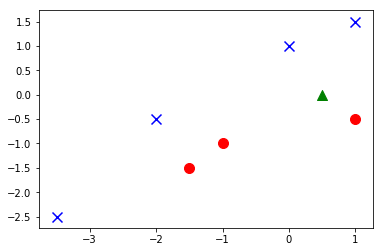

In [9]:
X = np.array([[-1, -1], [-1.5, -1.5], [1, -0.5], 
              [-3.5, -2.5], [0, 1], [1, 1.5], [-2, -0.5]])
y = np.array([1, 1, 1, 2, 2, 2, 2])

plt.scatter(X[y==1,0], X[y==1,1], s=100, marker='o', c='r')
plt.scatter(X[y==2,0], X[y==2,1], s=100, marker='x', c='b')

x_new = [0.5, 0]

plt.scatter(x_new[0], x_new[1], s=100, marker='^', c='g')
plt.show()

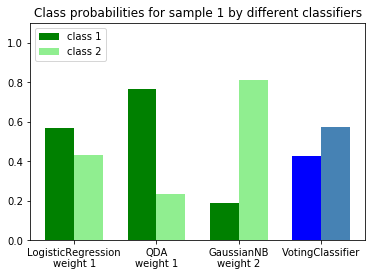

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], 
                            voting='soft', weights=[1, 1, 2])

probas = [c.fit(X, y).predict_proba([x_new]) for c in (model1, model2, model3, ensemble)]
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

ind = np.arange(4)
width = 0.35  # bar width
p1 = plt.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color='green')
p2 = plt.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width, color='lightgreen')
p3 = plt.bar(ind, [0, 0, 0, class1_1[-1]], width, color='blue')
p4 = plt.bar(ind + width, [0, 0, 0, class2_1[-1]], width, color='steelblue')

plt.xticks(ind + 0.5 * width, ['LogisticRegression\nweight 1',
                               'QDA\nweight 1',
                               'GaussianNB\nweight 2',
                               'VotingClassifier'])
plt.ylim([0, 1.1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.show()

## Boosting 과 Gradient Boosting